In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from datetime import timedelta, datetime as dt
from o2_vix import get_range, get_range_multi
plt.style.use('ggplot')

## Load events date data

In [2]:
os.chdir("C:/Users/zheng/Documents/Finance Research/")
event_df = pd.read_csv("Data/macro/data/macro/macro_announcement_dates_202112.csv")
for col in event_df.columns:
    event_df[col] = pd.to_datetime(event_df[col], format="%m/%d/%Y")
event_df.head()

,Unemployment Rate,Consumer Price Index,Producer Price Index,CFNAI,EIA,OPEC,IEA,Old_FOMC,New_FOMC,GDP Annualized Advanced,...,Factory Orders,New Home Sales,Personal Consumption,Monthly Budget Statement,Initial Jobless Claims,Chicago Purchasing Manager Index,U. Michigan Consumer Confidence P,U. Michigan Consumer Confidence F,Actual fed funds target rate FFTR,Inflation
0,1957-07-11,1953-02-27,1971-02-17,2001-03-05,2001-05-23,2001-01-19,1991-01-01,1936-03-19,1994-02-04,1968-01-16,...,1990-01-05,1990-01-03,1990-01-29,1990-02-22,1991-07-18,1996-11-27,1991-01-18,1991-02-01,1990-02-07,1980-02-15
1,1957-08-12,1953-03-26,1971-03-05,2001-04-03,2001-05-31,2001-02-20,1991-02-01,1936-05-25,1994-03-22,1968-04-17,...,1990-02-02,1990-01-31,1990-03-01,1990-03-21,1991-07-25,1996-12-31,1991-02-15,1991-03-01,1990-03-27,1980-03-07
2,1957-09-10,1953-04-22,1971-04-01,2001-05-02,2001-06-06,2001-03-22,1991-04-01,1936-11-20,1994-05-17,1968-07-18,...,1990-03-07,1990-03-02,1990-03-29,1990-04-20,1991-08-01,1997-01-31,1991-03-15,1991-03-29,1990-05-15,1980-04-04
3,1957-10-10,1953-05-22,1971-05-06,2001-05-31,2001-06-13,2001-04-20,1991-05-01,1937-01-26,1994-07-06,1968-10-16,...,1990-03-30,1990-03-28,1990-04-30,1990-05-21,1991-08-08,1997-02-28,1991-04-19,1991-05-03,1990-07-03,1980-05-09
4,1957-11-08,1953-06-23,1971-06-04,2001-07-05,2001-06-20,2001-05-17,1991-07-03,1937-03-15,1994-08-16,1969-01-14,...,1990-05-02,1990-04-30,1990-05-25,1990-06-21,1991-08-15,1997-03-31,1991-05-17,1991-05-31,1990-08-21,1980-06-06


In [5]:
event_df.columns

Index(['Unemployment Rate', 'Consumer Price Index', 'Producer Price Index',
       'CFNAI', 'EIA', 'OPEC', 'IEA', 'Old_FOMC', 'New_FOMC',
       'GDP Annualized Advanced', 'GDP Annualized Preliminary',
       'GDP Annualized Final', 'Housing', 'Consumer Credit', 'ISM/NAPM',
       'IP/Capacity Utilization', 'Durable Goods Orders', 'Housing Starts',
       'Leading Indicators', 'Trade Balance', 'Advance Retail Sales',
       'Business Inventories', 'Construction Spending', 'Consumer Confidence',
       'Factory Orders', 'New Home Sales', 'Personal Consumption',
       'Monthly Budget Statement', 'Initial Jobless Claims',
       'Chicago Purchasing Manager Index', 'U. Michigan Consumer Confidence P',
       'U. Michigan Consumer Confidence F',
       'Actual fed funds target rate FFTR', 'Inflation'],
      dtype='object')

## Load VIX Index, and chained VIX futures data

In [3]:
vix_index = pd.read_csv("Data/vix_futures/data/vix_futures/IAP/IAP.csv")
vix_index["Datetime"] = pd.to_datetime(vix_index["Date"] + " " + vix_index["Time"], format="%m/%d/%Y %H:%M:%S.%f")
vix_index["Datetime"] = vix_index["Datetime"] + timedelta(hours=1) # Adjust time to ET
vix_index.set_index('Datetime', inplace=True)
vix_index.drop(['Date', 'Time'], axis = 1, inplace=True)
vix_index.head()

,Price
Datetime,
2003-07-01 09:45:05,22.47
2003-07-01 09:46:05,22.46
2003-07-01 09:47:05,22.20
2003-07-01 09:48:05,22.44
2003-07-01 09:49:05,22.34


In [7]:
vix_index.shape

(11139274, 1)

In [4]:
vix_futures = pd.read_csv("Data/vix_futures/S&P 500 VIX Futures Historical Data.csv")
vix_futures['Datetime'] = pd.to_datetime(vix_futures["Date"], format="%m/%d/%Y") 
vix_futures = vix_futures.set_index("Datetime")
vix_futures.drop(['Date', 'Change %'], axis = 1, inplace=True)
vix_futures.sort_index(inplace=True)
# vix_futures['Change %'] = vix_futures['Price'].pct_change() * 100
vix_futures.tail()

,Price,Open,High,Low,Vol.
Datetime,,,,,
2024-05-12,13.58,13.53,13.58,13.53,NaN
2024-05-13,13.82,13.55,13.90,13.40,72.21K
2024-05-14,13.58,13.88,13.93,13.48,NaN
2024-05-15,12.93,13.63,13.63,12.88,NaN
2024-05-16,13.03,12.98,13.08,12.83,NaN


In [9]:
vix_futures.shape

(3808, 5)

## Filtering

- FOMC dates

In [5]:
fomc_dates = list(event_df['New_FOMC'].dropna())

- FOMC dates with time

In [6]:
fomc_datetimes = event_df['New_FOMC'] + pd.Timedelta(hours=14)
fomc_datetimes = list(fomc_datetimes.dropna())

- +- 10 days VIX around FOMC Date

In [9]:
vix_10d = get_range(vix_index, fomc_dates, 10, 10,freq='d')
vix_10d['Change %'] = vix_10d.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_10d.dropna(inplace=True)
vix_10d.head(22)

Price  Datetime Label   Change %
Event Datetime Datetime                                    
2003-08-12     2003-07-29  20.27             -10   0.445986
               2003-07-30  20.81              -9   2.664036
               2003-07-31  21.04              -8   1.105238
               2003-08-01  22.03              -7   4.705323
               2003-08-04  23.68              -6   7.489787
               2003-08-05  22.76              -5  -3.885135
               2003-08-06  25.38              -4  11.511424
               2003-08-07  23.56              -3  -7.171001
               2003-08-08  21.88              -2  -7.130730
               2003-08-11  22.19              -1   1.416819
               2003-08-12  21.16               0  -4.641731
               2003-08-13  20.39               1  -3.638941
               2003-08-14  21.11               2   3.531143
               2003-08-15  20.97               3  -0.663193
               2003-08-18  20.21               4  -3.624225
               2003-08-19  19.62               5  -2.919347
               2003-08-20  19.79               6   0.866463
               2003-08-21  19.79               7   0.000000
               2003-08-22  19.48               8  -1.566448
               2003-08-25  20.69               9   6.211499
               2003-08-26  21.13              10   2.126631
2003-09-16     2003-09-02  20.12             -10  -2.613746

In [10]:
vix_10d.to_csv("Data/filtered/vix_10d.csv")

- +- 10 days VIX Futures (1 Month Exp) around FOMC Date

In [11]:
vix_fut_10d = get_range(vix_futures, fomc_dates, 10, 10, freq='d')
vix_fut_10d['Change %'] = vix_fut_10d.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_fut_10d.dropna(inplace=True)
vix_fut_10d.head(30)

KeyError: Timestamp('2012-04-25 00:00:00')

- +- 10 hours VIX around FOMC Datetime

In [14]:
vix_10h = get_range(vix_index, fomc_datetimes, 10, freq='h')
vix_10h['Change %'] = vix_10h.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_10h.dropna(inplace=True)
vix_10h.head(22)

Price  Datetime Label  Change %
Event Datetime      Datetime                                            
2003-08-12 14:00:00 2003-08-11 11:00:00  21.53             -10 -1.464531
                    2003-08-11 12:00:00  21.94              -9  1.904320
                    2003-08-11 13:00:00  22.09              -8  0.683683
                    2003-08-11 14:00:00  21.79              -7 -1.358081
                    2003-08-11 15:00:00  21.80              -6  0.045893
                    2003-08-12 09:00:00  21.16              -5 -2.935780
                    2003-08-12 10:00:00  21.24              -4  0.378072
                    2003-08-12 11:00:00  21.23              -3 -0.047081
                    2003-08-12 12:00:00  21.04              -2 -0.894960
                    2003-08-12 13:00:00  20.92              -1 -0.570342
                    2003-08-12 14:00:00  20.74               0 -0.860421
                    2003-08-12 15:00:00  20.50               1 -1.157184
                    2003-08-13 09:00:00  20.39               2 -0.536585
                    2003-08-13 10:00:00  20.31               3 -0.392349
                    2003-08-13 11:00:00  20.62               4  1.526342
                    2003-08-13 12:00:00  21.09               5  2.279340
                    2003-08-13 13:00:00  20.76               6 -1.564723
                    2003-08-13 14:00:00  20.68               7 -0.385356
                    2003-08-13 15:00:00  20.38               8 -1.450677
                    2003-08-14 09:00:00  21.11               9  3.581943
                    2003-08-14 10:00:00  21.13              10  0.094742
2003-09-16 14:00:00 2003-09-15 11:00:00  20.67             -10 -1.944972

- +- 10 hours VIX Futures (1 month EXP) around FOMC Datetime

In [15]:
vix_fut_10h = get_range_multi(fomc_datetimes, roll=1, range_width=10, freq='h')
vix_fut_10h['Price'] = (vix_fut_10h['Close Bid Price'] + vix_fut_10h['Close Ask Price']) / 2
vix_fut_10h['Change %'] = vix_fut_10h.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_fut_10h.dropna(inplace=True)
vix_fut_10h.head(30)

Symbol        Date  \
Event Datetime      Datetime                                 
2012-08-01 14:00:00 2012-07-31 13:00:00  VXU12  07/31/2012   
                    2012-07-31 14:00:00  VXU12  07/31/2012   
                    2012-07-31 15:00:00  VXU12  07/31/2012   
                    2012-07-31 16:00:00  VXU12  07/31/2012   
                    2012-08-01 08:00:00  VXU12  08/01/2012   
                    2012-08-01 09:00:00  VXU12  08/01/2012   
                    2012-08-01 10:00:00  VXU12  08/01/2012   
                    2012-08-01 11:00:00  VXU12  08/01/2012   
                    2012-08-01 12:00:00  VXU12  08/01/2012   
                    2012-08-01 13:00:00  VXU12  08/01/2012   
                    2012-08-01 14:00:00  VXU12  08/01/2012   
                    2012-08-01 15:00:00  VXU12  08/01/2012   
                    2012-08-01 16:00:00  VXU12  08/01/2012   
                    2012-08-02 08:00:00  VXU12  08/02/2012   
                    2012-08-02 09:00:00  VXU12  08/02/2012   
                    2012-08-02 10:00:00  VXU12  08/02/2012   
                    2012-08-02 11:00:00  VXU12  08/02/2012   
                    2012-08-02 12:00:00  VXU12  08/02/2012   
                    2012-08-02 13:00:00  VXU12  08/02/2012   
                    2012-08-02 14:00:00  VXU12  08/02/2012   
                    2012-08-02 15:00:00  VXU12  08/02/2012   
2012-09-13 14:00:00 2012-09-12 13:00:00  VXV12  09/12/2012   
                    2012-09-12 14:00:00  VXV12  09/12/2012   
                    2012-09-12 15:00:00  VXV12  09/12/2012   
                    2012-09-12 16:00:00  VXV12  09/12/2012   
                    2012-09-13 08:00:00  VXV12  09/13/2012   
                    2012-09-13 09:00:00  VXV12  09/13/2012   
                    2012-09-13 10:00:00  VXV12  09/13/2012   
                    2012-09-13 11:00:00  VXV12  09/13/2012   
                    2012-09-13 12:00:00  VXV12  09/13/2012   

                                                       Time  \
Event Datetime      Datetime                                  
2012-08-01 14:00:00 2012-07-31 13:00:00  13:00:00.000000000   
                    2012-07-31 14:00:00  14:00:00.000000000   
                    2012-07-31 15:00:00  15:00:00.000000000   
                    2012-07-31 16:00:00  16:00:00.000000000   
                    2012-08-01 08:00:00  08:05:00.000000000   
                    2012-08-01 09:00:00  09:00:00.000000000   
                    2012-08-01 10:00:00  10:00:00.000000000   
                    2012-08-01 11:00:00  11:00:00.000000000   
                    2012-08-01 12:00:00  12:00:00.000000000   
                    2012-08-01 13:00:00  13:00:00.000000000   
                    2012-08-01 14:00:00  14:00:00.000000000   
                    2012-08-01 15:00:00  15:00:00.000000000   
                    2012-08-01 16:00:00  16:00:00.000000000   
                    2012-08-02 08:00:00  08:05:00.000000000   
                    2012-08-02 09:00:00  09:00:00.000000000   
                    2012-08-02 10:00:00  10:00:00.000000000   
                    2012-08-02 11:00:00  11:00:00.000000000   
                    2012-08-02 12:00:00  12:00:00.000000000   
                    2012-08-02 13:00:00  13:00:00.000000000   
                    2012-08-02 14:00:00  14:00:00.000000000   
                    2012-08-02 15:00:00  15:00:00.000000000   
2012-09-13 14:00:00 2012-09-12 13:00:00  13:00:00.000000000   
                    2012-09-12 14:00:00  14:00:00.000000000   
                    2012-09-12 15:00:00  15:00:00.000000000   
                    2012-09-12 16:00:00  16:00:00.000000000   
                    2012-09-13 08:00:00  08:05:00.000000000   
                    2012-09-13 09:00:00  09:00:00.000000000   
                    2012-09-13 10:00:00  10:00:00.000000000   
                    2012-09-13 11:00:00  11:00:00.000000000   
                    2012-09-13 12:00:00  12:00:00.000000000   

                                      

- +- 10 10 minute intervals VIX around FOMC Datetime

In [16]:
# Price is the first entry of the Datetime interval
vix_10m = get_range(vix_index, fomc_datetimes, 10, freq='10min')
vix_10m['Change %'] = vix_10m.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_10m.dropna(inplace=True)
vix_10m.head(22)

Price  Datetime Label  Change %
Event Datetime      Datetime                                            
2003-08-12 14:00:00 2003-08-12 12:20:00  20.85             -10  0.047985
                    2003-08-12 12:30:00  20.84              -9 -0.047962
                    2003-08-12 12:40:00  20.83              -8 -0.047985
                    2003-08-12 12:50:00  20.82              -7 -0.048008
                    2003-08-12 13:00:00  20.92              -6  0.480307
                    2003-08-12 13:10:00  20.96              -5  0.191205
                    2003-08-12 13:20:00  20.97              -4  0.047710
                    2003-08-12 13:30:00  20.99              -3  0.095374
                    2003-08-12 13:40:00  20.81              -2 -0.857551
                    2003-08-12 13:50:00  21.33              -1  2.498799
                    2003-08-12 14:00:00  20.74               0 -2.766057
                    2003-08-12 14:10:00  20.65               1 -0.433944
                    2003-08-12 14:20:00  20.86               2  1.016949
                    2003-08-12 14:30:00  20.66               3 -0.958773
                    2003-08-12 14:40:00  20.49               4 -0.822846
                    2003-08-12 14:50:00  20.50               5  0.048804
                    2003-08-12 15:00:00  20.50               6  0.000000
                    2003-08-12 15:10:00  20.48               7 -0.097561
                    2003-08-12 15:20:00  20.34               8 -0.683594
                    2003-08-12 15:30:00  20.49               9  0.737463
                    2003-08-12 15:40:00  20.32              10 -0.829673
2003-09-16 14:00:00 2003-09-16 12:20:00  20.47             -10 -0.631068

- +- 10 10 minute VIX Futures (1 month EXP) around FOMC Datetime

In [17]:
vix_fut_10m = get_range_multi(fomc_datetimes, roll=1, range_width=10, freq='10min')
vix_fut_10m['Price'] = (vix_fut_10m['Close Bid Price'] + vix_fut_10m['Close Ask Price']) / 2
vix_fut_10m['Change %'] = vix_fut_10m.groupby(level='Event Datetime')['Price'].pct_change() * 100
vix_fut_10m.dropna(inplace=True)
vix_fut_10m.head(30)

Symbol        Date  \
Event Datetime      Datetime                                 
2012-08-01 14:00:00 2012-08-01 12:20:00  VXU12  08/01/2012   
                    2012-08-01 12:30:00  VXU12  08/01/2012   
                    2012-08-01 12:40:00  VXU12  08/01/2012   
                    2012-08-01 12:50:00  VXU12  08/01/2012   
                    2012-08-01 13:00:00  VXU12  08/01/2012   
                    2012-08-01 13:10:00  VXU12  08/01/2012   
                    2012-08-01 13:20:00  VXU12  08/01/2012   
                    2012-08-01 13:30:00  VXU12  08/01/2012   
                    2012-08-01 13:40:00  VXU12  08/01/2012   
                    2012-08-01 13:50:00  VXU12  08/01/2012   
                    2012-08-01 14:00:00  VXU12  08/01/2012   
                    2012-08-01 14:10:00  VXU12  08/01/2012   
                    2012-08-01 14:20:00  VXU12  08/01/2012   
                    2012-08-01 14:30:00  VXU12  08/01/2012   
                    2012-08-01 14:40:00  VXU12  08/01/2012   
                    2012-08-01 14:50:00  VXU12  08/01/2012   
                    2012-08-01 15:00:00  VXU12  08/01/2012   
                    2012-08-01 15:10:00  VXU12  08/01/2012   
                    2012-08-01 15:20:00  VXU12  08/01/2012   
                    2012-08-01 15:30:00  VXU12  08/01/2012   
                    2012-08-01 15:40:00  VXU12  08/01/2012   
2012-09-13 14:00:00 2012-09-13 12:20:00  VXV12  09/13/2012   
                    2012-09-13 12:30:00  VXV12  09/13/2012   
                    2012-09-13 12:40:00  VXV12  09/13/2012   
                    2012-09-13 12:50:00  VXV12  09/13/2012   
                    2012-09-13 13:00:00  VXV12  09/13/2012   
                    2012-09-13 13:10:00  VXV12  09/13/2012   
                    2012-09-13 13:20:00  VXV12  09/13/2012   
                    2012-09-13 13:30:00  VXV12  09/13/2012   
                    2012-09-13 13:40:00  VXV12  09/13/2012   

                                                       Time  \
Event Datetime      Datetime                                  
2012-08-01 14:00:00 2012-08-01 12:20:00  12:20:00.000000000   
                    2012-08-01 12:30:00  12:30:00.000000000   
                    2012-08-01 12:40:00  12:40:00.000000000   
                    2012-08-01 12:50:00  12:50:00.000000000   
                    2012-08-01 13:00:00  13:00:00.000000000   
                    2012-08-01 13:10:00  13:10:00.000000000   
                    2012-08-01 13:20:00  13:20:00.000000000   
                    2012-08-01 13:30:00  13:30:00.000000000   
                    2012-08-01 13:40:00  13:40:00.000000000   
                    2012-08-01 13:50:00  13:50:00.000000000   
                    2012-08-01 14:00:00  14:00:00.000000000   
                    2012-08-01 14:10:00  14:10:00.000000000   
                    2012-08-01 14:20:00  14:20:00.000000000   
                    2012-08-01 14:30:00  14:30:00.000000000   
                    2012-08-01 14:40:00  14:40:00.000000000   
                    2012-08-01 14:50:00  14:50:00.000000000   
                    2012-08-01 15:00:00  15:00:00.000000000   
                    2012-08-01 15:10:00  15:10:00.000000000   
                    2012-08-01 15:20:00  15:20:00.000000000   
                    2012-08-01 15:30:00  15:30:00.000000000   
                    2012-08-01 15:40:00  15:40:00.000000000   
2012-09-13 14:00:00 2012-09-13 12:20:00  12:20:00.000000000   
                    2012-09-13 12:30:00  12:30:00.000000000   
                    2012-09-13 12:40:00  12:40:00.000000000   
                    2012-09-13 12:50:00  12:50:00.000000000   
                    2012-09-13 13:00:00  13:00:00.000000000   
                    2012-09-13 13:10:00  13:10:00.000000000   
                    2012-09-13 13:20:00  13:20:00.000000000   
                    2012-09-13 13:30:00  13:30:00.000000000   
                    2012-09-13 13:40:00  13:40:00.000000000   

                                      

## Cross-Sectional Averages

### 10 days VIX around FOMC

In [18]:
vix_10d_ca = vix_10d.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_10d_ca

,Datetime Label,Change %
0,-10,-0.940157
1,-9,-0.005510
2,-8,-0.371259
3,-7,1.579781
4,-6,-0.766427
5,-5,0.380802
6,-4,-0.622325
7,-3,-0.057249
8,-2,2.726038
9,-1,0.870924


Text(0, 0.5, '% Change from previous day')

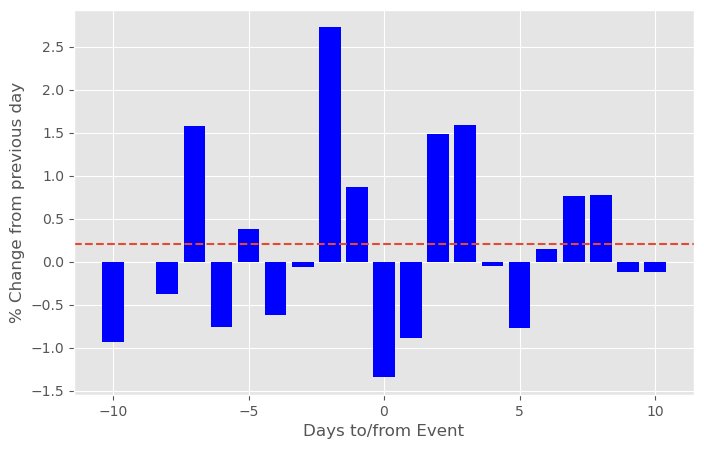

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_10d_ca['Datetime Label'], vix_10d_ca["Change %"],color='b')
ax.set_xlabel('Days to/from Event', fontsize=12)
ax.axhline(np.mean(vix_10d_ca["Change %"]), linestyle = '--')
ax.set_ylabel("% Change from previous day", fontsize=12)

Text(0, 0.5, '% Change from previous day')

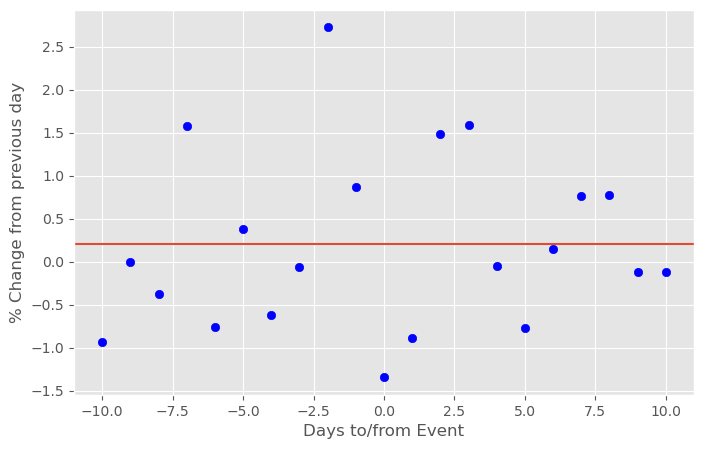

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.scatter(vix_10d_ca['Datetime Label'], vix_10d_ca["Change %"],color='b')
ax.set_xlabel('Days to/from Event', fontsize=12)
ax.axhline(np.mean(vix_10d_ca["Change %"]))
ax.set_ylabel("% Change from previous day", fontsize=12)

In [21]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_10d[vix_10d['Datetime Label']==i]['Change %'],  0)
    if result.pvalue < 0.1:
        print(f"The Change % of T{i} is significant")

The Change % of T-10 is significant
The Change % of T-7 is significant
The Change % of T-2 is significant
The Change % of T0 is significant
The Change % of T2 is significant
The Change % of T3 is significant


### 10 days VIX Futures around FOMC

In [22]:
vix_fut_10d_ca = vix_fut_10d.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_fut_10d_ca

,Datetime Label,Change %
0,-10,-0.214821
1,-9,1.540817
2,-8,-0.698943
3,-7,-0.749505
4,-6,-0.070344
5,-5,0.111932
6,-4,1.185772
7,-3,0.027471
8,-2,0.611097
9,-1,-1.302221


Text(0, 0.5, '% Change from previous day')

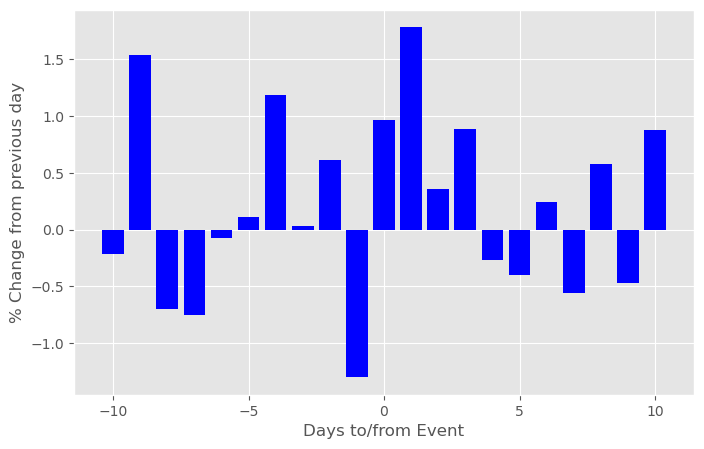

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_fut_10d_ca['Datetime Label'], vix_fut_10d_ca['Change %'],color='b')
ax.set_xlabel('Days to/from Event', fontsize=12)
ax.set_ylabel("% Change from previous day", fontsize=12)

Text(0, 0.5, '% Change from previous day')

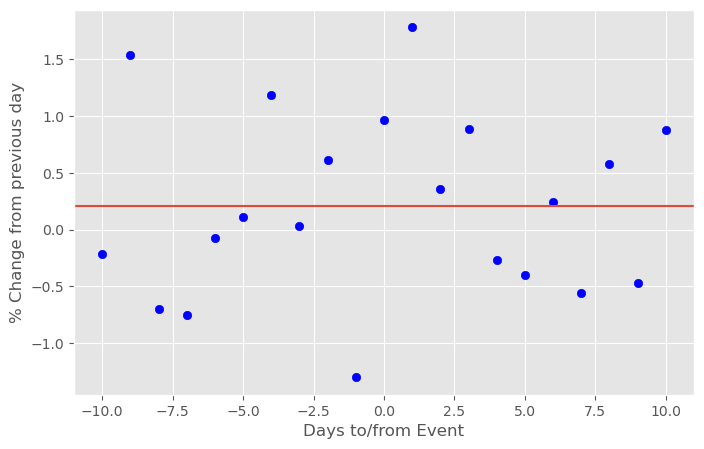

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.scatter(vix_fut_10d_ca['Datetime Label'], vix_fut_10d_ca['Change %'],color='b')
ax.set_xlabel('Days to/from Event', fontsize=12)
ax.axhline(np.mean(vix_fut_10d_ca['Change %']))
ax.set_ylabel("% Change from previous day", fontsize=12)

In [25]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_fut_10d[vix_fut_10d['Datetime Label']==i]['Change %'],  0)
    if result.pvalue < 0.1:
        print(f"The Change % of T{i} is significant")

The Change % of T-9 is significant
The Change % of T-1 is significant
The Change % of T1 is significant


### 10 Hours VIX around FOMC time

In [26]:
vix_10h_ca = vix_10h.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_10h_ca

,Datetime Label,Change %
0,-10,0.010384
1,-9,-0.237034
2,-8,0.046132
3,-7,-0.052640
4,-6,0.080602
5,-5,-0.643703
6,-4,0.150699
7,-3,-0.134473
8,-2,-0.008964
9,-1,-0.048934


Text(0, 0.5, '% Change from previous hour')

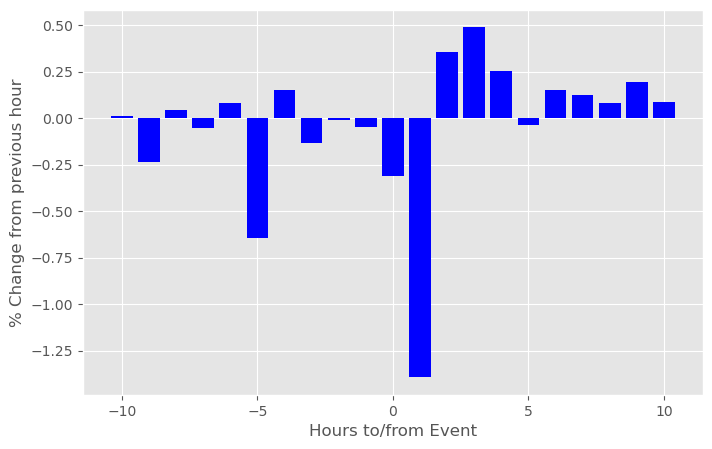

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_10h_ca['Datetime Label'], vix_10h_ca['Change %'],color='b')
ax.set_xlabel('Hours to/from Event', fontsize=12)
ax.set_ylabel("% Change from previous hour", fontsize=12)

In [45]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_10h[vix_10h['Datetime Label']==i]['Change %'],  0)
    if result.pvalue < 0.15:
        print(f"The Change % of T{i} is significant")

The Change % of T-9 is significant
The Change % of T-5 is significant
The Change % of T0 is significant
The Change % of T1 is significant


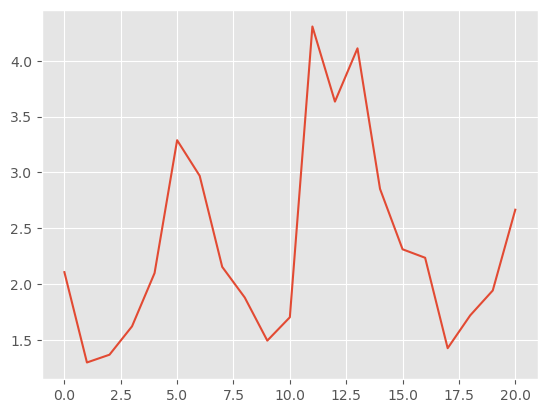

In [49]:
sd = []
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_10h[vix_10h['Datetime Label']==i]['Change %'],  0)
    # if result.pvalue < 0.5:
    # print(f"The Change % of T{i} is significant")
    sd.append(np.std(vix_10h[vix_10h['Datetime Label']==i]['Change %']))
plt.plot(sd)

### 10 Hours VIX Futures around FOMC time

In [29]:
vix_fut_10h_ca = vix_fut_10h.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_fut_10h_ca

,Datetime Label,Change %
0,-10,-0.079501
1,-9,-0.019202
2,-8,-0.025833
3,-7,0.007033
4,-6,0.009099
5,-5,-0.031644
6,-4,-0.026057
7,-3,0.024107
8,-2,-0.084701
9,-1,-0.206001


Text(0, 0.5, '% Change from previous hour')

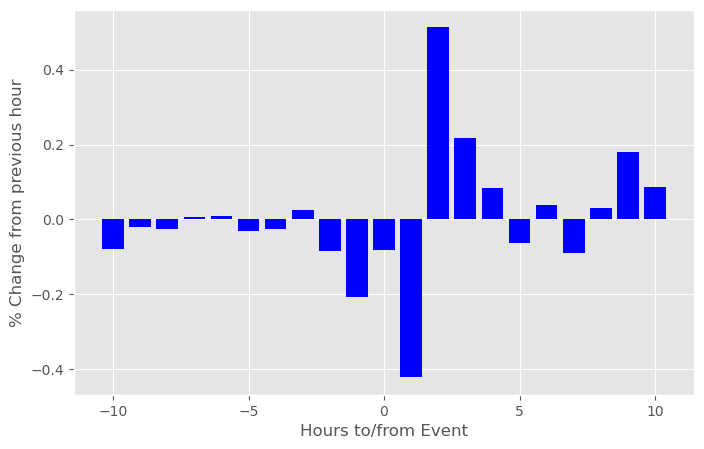

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_fut_10h_ca['Datetime Label'], vix_fut_10h_ca['Change %'],color='b')
ax.set_xlabel('Hours to/from Event', fontsize=12)
ax.set_ylabel("% Change from previous hour", fontsize=12)

In [44]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_fut_10h[vix_fut_10h['Datetime Label']==i]['Change %'],  0)
    # if result.pvalue < 0.5:
    # print(f"The Change % of T{i} is significant")
    print(result.pvalue, np.std(vix_fut_10h[vix_fut_10h['Datetime Label']==i]['Change %']))

0.2623086607842719 0.588598179893572
0.7018598407693759 0.41794685794124226
0.718346071973001 0.5968319797387173
0.9311169069290355 0.6782926264681703
0.8931519596714345 0.5647468081012424
0.7545829504431621 0.8436055202505736
0.8208903720720648 0.9593250013849326
0.8240043183468353 0.9035268271492654
0.5515085215574091 1.1842705092836778
0.05103937382334209 0.8681824214058501
0.288399675172339 0.643066286113076
0.13830498280338913 2.347800251259994
0.04015374957794257 2.0520537462402673
0.1480506443767528 1.2410845479918136
0.24372752045997229 0.6069969738226236
0.5177514137977506 0.8216659632345674
0.6887835751908353 0.804036978554947
0.3921017821175603 0.856595027866219
0.6738956861285788 0.6287013286886902
0.003986605869036309 0.504425817253397
0.32876922158024735 0.7379284021409859


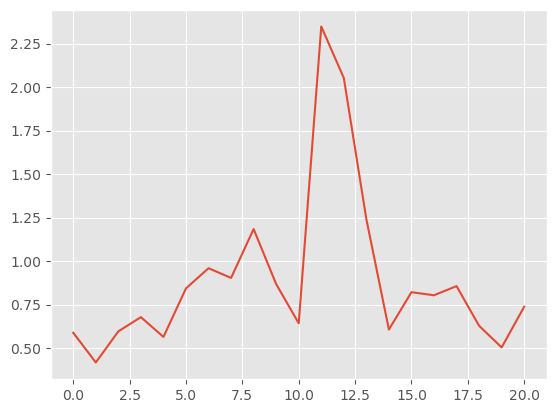

: 

In [50]:
sd = []
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_fut_10h[vix_fut_10h['Datetime Label']==i]['Change %'],  0)
    # if result.pvalue < 0.5:
    # print(f"The Change % of T{i} is significant")
    sd.append(np.std(vix_fut_10h[vix_fut_10h['Datetime Label']==i]['Change %']))
plt.plot(sd)

In [40]:
np.std(vix_fut_10h[vix_fut_10h['Datetime Label']==2]['Change %'])

2.0520537462402673

In [43]:
np.std(vix_fut_10h[vix_fut_10h['Datetime Label']==-1]['Change %'])

0.8681824214058501

### 10 10 minute intervals VIX around FOMC time

In [32]:
vix_10m_ca = vix_10m.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_10m_ca

,Datetime Label,Change %
0,-10,0.049504
1,-9,0.032406
2,-8,-0.030533
3,-7,-0.063907
4,-6,-0.020625
5,-5,0.035860
6,-4,0.036344
7,-3,-0.008273
8,-2,0.007307
9,-1,-0.023770


Text(0, 0.5, '% Change from previous interval')

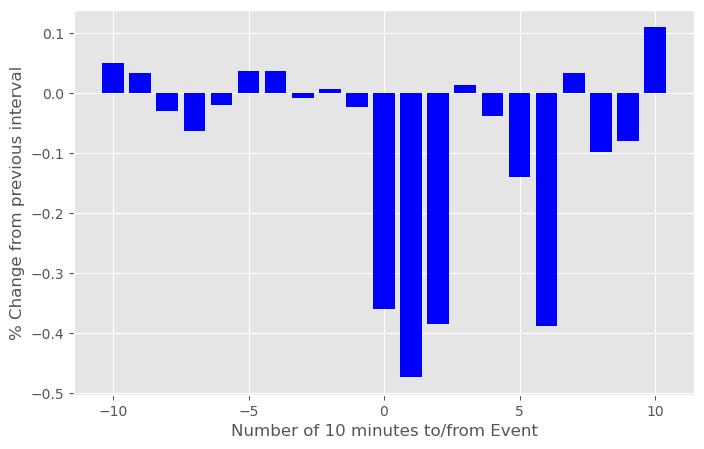

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_10m_ca['Datetime Label'], vix_10m_ca["Change %"],color='b')
ax.set_xlabel('Number of 10 minutes to/from Event', fontsize=12)
ax.set_ylabel("% Change from previous interval", fontsize=12)

In [34]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_10m[vix_10m['Datetime Label']==i]['Change %'],  0)
    if result.pvalue < 0.05:
        print(f"The Change % of T{i} is significant")

The Change % of T0 is significant
The Change % of T1 is significant
The Change % of T2 is significant
The Change % of T6 is significant


### 10 10 minute intervals VIX Futures (1 month EXP) around FOMC time

In [35]:
vix_fut_10m_ca = vix_fut_10m.groupby('Datetime Label')['Change %'].mean().reset_index()
vix_fut_10m_ca

,Datetime Label,Change %
0,-10,-0.042221
1,-9,0.021110
2,-8,-0.068675
3,-7,-0.067931
4,-6,-0.067246
5,-5,0.150521
6,-4,0.021158
7,-3,-0.039772
8,-2,0.002836
9,-1,-0.051463


Text(0, 0.5, '% Change from previous interval')

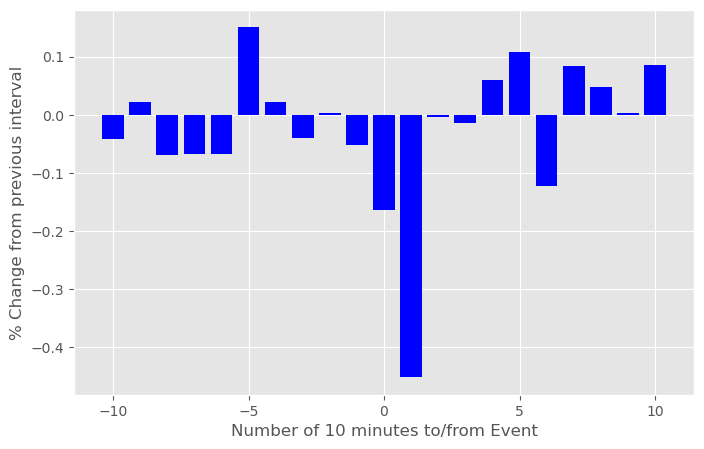

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
handles, labels = ax.get_legend_handles_labels()
ax.bar(vix_fut_10m_ca['Datetime Label'], vix_fut_10m_ca["Change %"],color='b')
ax.set_xlabel('Number of 10 minutes to/from Event', fontsize=12)
ax.set_ylabel("% Change from previous interval", fontsize=12)

In [37]:
for i in range(-10, 11):
    result = scipy.stats.ttest_1samp(vix_fut_10m[vix_fut_10m['Datetime Label']==i]['Change %'],  0)
    if result.pvalue < 0.05:
        print(f"The Change % of T{i} is significant")

The Change % of T-5 is significant
The Change % of T0 is significant
The Change % of T1 is significant
